# Income classification using ML models

In [54]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import os
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [55]:
df= pd.read_csv(r'C:\Users\COMP\Downloads\Clustering With K Means\income_evaluation.csv')
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [56]:
#Data Processing and Visualisations

In [57]:
df=df.drop(' fnlwgt', axis=1)
df=df.drop(' education', axis=1)
df

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [58]:
#Identifying categorical variables

In [59]:
cat_cols = list(df.select_dtypes(include=['object']).columns)
print(f"Number of categorical columns: {len(cat_cols)}")
print(f"Categorical columns:\n{cat_cols}")

Number of categorical columns: 8
Categorical columns:
[' workclass', ' marital-status', ' occupation', ' relationship', ' race', ' sex', ' native-country', ' income']


In [60]:
num_cols = [x for x in df.select_dtypes(include=["number"]).columns
            if x not in cat_cols
            if x not in [" income"]]
print(f"Number of numerical columns: {len(num_cols)}")
print(f"Numerical columns:\n{num_cols}")

Number of numerical columns: 5
Numerical columns:
['age', ' education-num', ' capital-gain', ' capital-loss', ' hours-per-week']


In [61]:
#Checking for missing values

In [62]:
# List of columns that have null values
features_with_na = [col for col in df.columns if df[col].isna().sum() > 0]

# Precentage of missing data
missing_values_df = pd.DataFrame(df[features_with_na].isnull().mean().sort_values(ascending=False), columns=["percentage"])
missing_values_df.head(10)

,percentage


In [63]:
# How many features are missing more than some threshold
print(
    f"25% : {len(missing_values_df[missing_values_df['percentage'] > 0.25])}\n\
50% :  {len(missing_values_df[missing_values_df['percentage'] > 0.50])}\n\
75% :  {len(missing_values_df[missing_values_df['percentage'] > 0.75])}\n\
80% :  {len(missing_values_df[missing_values_df['percentage'] > 0.80])}\n\
90% :  {len(missing_values_df[missing_values_df['percentage'] > 0.90])}\n"
)

25% : 0
50% :  0
75% :  0
80% :  0
90% :  0



In [64]:
#Filling in NaN values

In [65]:
from sklearn.impute import SimpleImputer

# create an imputer object
imputer = SimpleImputer(strategy='mean')

# impute NaN values in numeric columns
numeric_columns = num_cols
df[numeric_columns] = imputer.fit_transform(df[numeric_columns])

# impute NaN values in categorical columns
categorical_columns = cat_cols
df[categorical_columns] = df[categorical_columns].fillna('Unknown')

In [66]:
df

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39.0,State-gov,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38.0,Private,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53.0,Private,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28.0,Private,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27.0,Private,12.0,Married-civ-spouse,Tech-support,Wife,White,Female,0.0,0.0,38.0,United-States,<=50K
32557,40.0,Private,9.0,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
32558,58.0,Private,9.0,Widowed,Adm-clerical,Unmarried,White,Female,0.0,0.0,40.0,United-States,<=50K
32559,22.0,Private,9.0,Never-married,Adm-clerical,Own-child,White,Male,0.0,0.0,20.0,United-States,<=50K


In [67]:
df.columns

Index(['age', ' workclass', ' education-num', ' marital-status', ' occupation',
       ' relationship', ' race', ' sex', ' capital-gain', ' capital-loss',
       ' hours-per-week', ' native-country', ' income'],
      dtype='object')

#Creating Visualisations with the given data:
1. Target Variable Income:

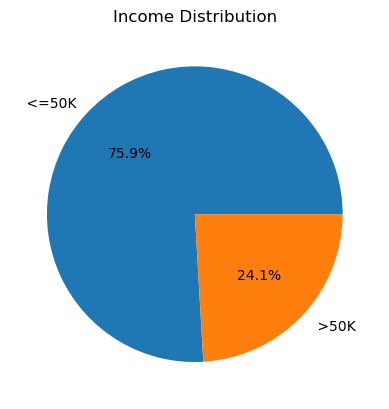

In [68]:
import matplotlib.pyplot as plt
import pandas as pd

income_counts = df[' income'].value_counts()
plt.pie(income_counts, labels=income_counts.index, autopct='%1.1f%%')
plt.title('Income Distribution')
plt.show()


2. Individual features and their relationship with the target variable

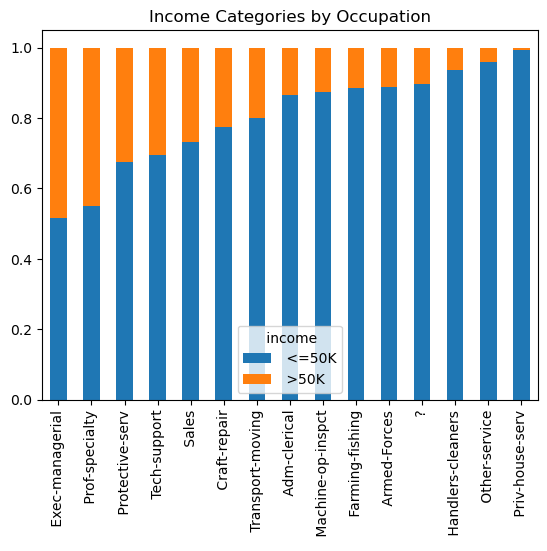

In [69]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a crosstab of occupation and income categories
df_ct = pd.crosstab(df[' occupation'], df[' income'])

# Calculate the percentage of each income category for each occupation
df_pct = df_ct.apply(lambda r: r/r.sum(), axis=1)

# Sort the data by the percentage of greater than 50K income category in descending order
df_pct = df_pct.sort_values(by=' >50K', ascending=False)

# Create a stacked bar chart of income categories by occupation
df_pct.plot(kind='bar', stacked=True)

plt.xlabel('')
plt.ylabel('')
plt.title('Income Categories by Occupation')
plt.xticks(rotation=90)
plt.show()

In [70]:
# Income distribution by Race and Sex

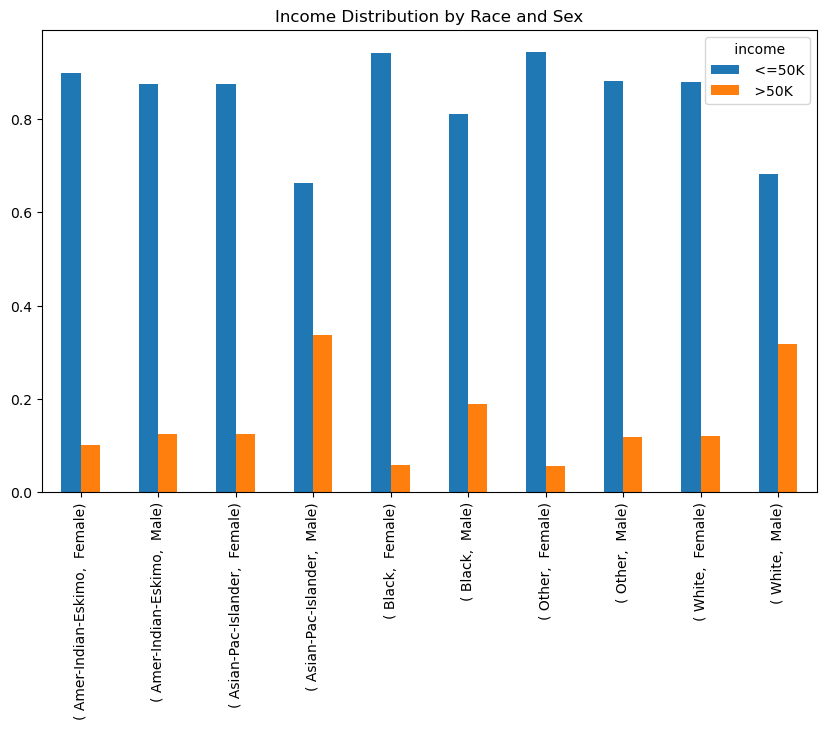

In [71]:
ct = pd.crosstab(index=[df[' race'], df[' sex']], columns=df[' income'], normalize='index')
ct.plot(kind='bar', figsize=(10, 6))# create a grouped bar chart
plt.title('Income Distribution by Race and Sex')
plt.xlabel('')
plt.ylabel('')
plt.show()

In [72]:
#Distribution of marital status

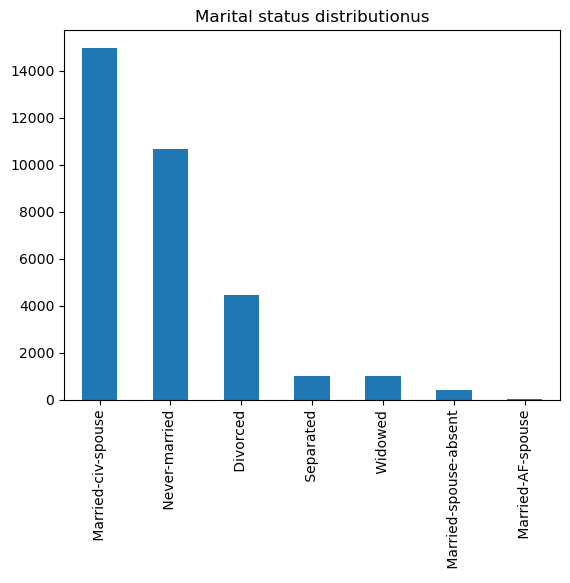

In [73]:
import matplotlib.pyplot as plt
import pandas as pd

df[' marital-status'].value_counts().plot(kind='bar')
plt.xlabel('')
plt.ylabel('')
plt.title('Marital status distributionus')
plt.show()

In [74]:
#Relationship between marital status and income

<AxesSubplot:xlabel=' income', ylabel=' marital-status'>

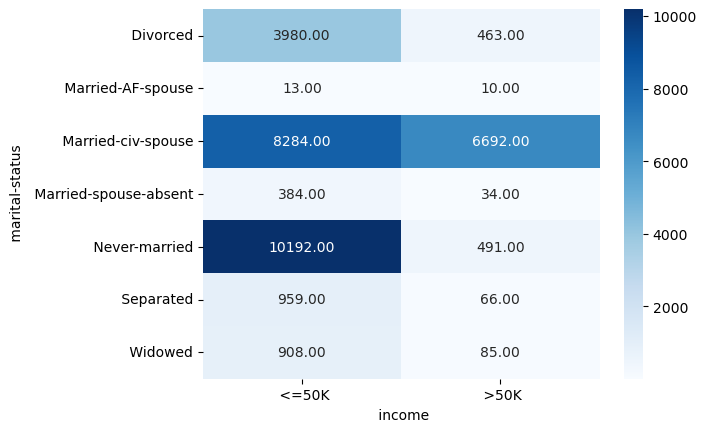

In [75]:
table = pd.crosstab(df[' marital-status'], df[' income'])
sns.heatmap(table, annot=True, fmt='.2f', cmap='Blues')

In [76]:
#Distribution of income by age and hours worked per week

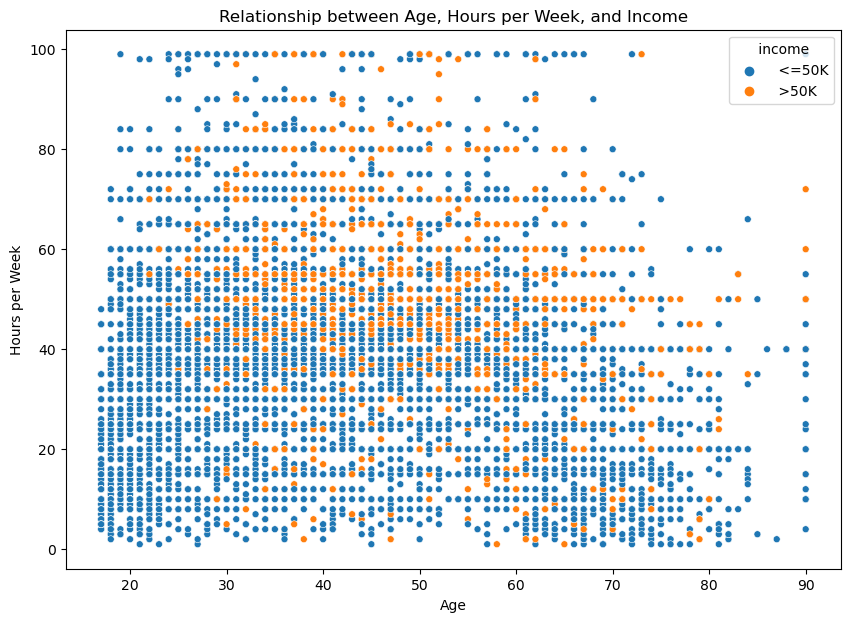

In [77]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=df, x= "age", y=" hours-per-week", hue=" income", s=25)
plt.title("Relationship between Age, Hours per Week, and Income")
plt.xlabel("Age")
plt.ylabel("Hours per Week")
plt.show()

In [78]:
# Distribution of income by age and sex

<AxesSubplot:xlabel=' sex', ylabel='age'>

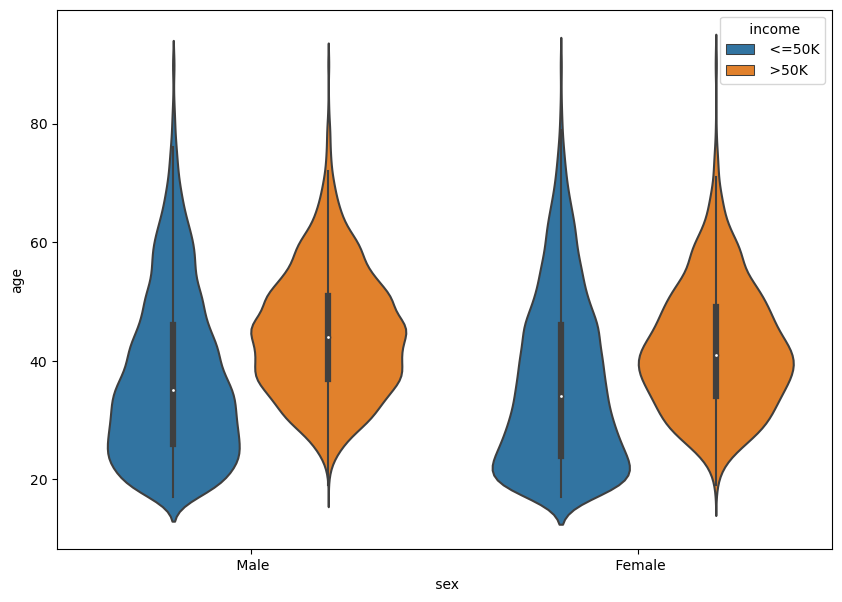

In [79]:
plt.figure(figsize=(10,7))
# create a violin plot with sex on the x-axis, age on the y-axis, and income as the hue
sns.violinplot(data=df, x=' sex', y='age', hue=' income')

In [80]:
#labelencoding

In [82]:
#Setting target variable

In [83]:
y = data_scaled[' income']
X_data = data_scaled.drop([' income'], axis=1)

Feature Engineering

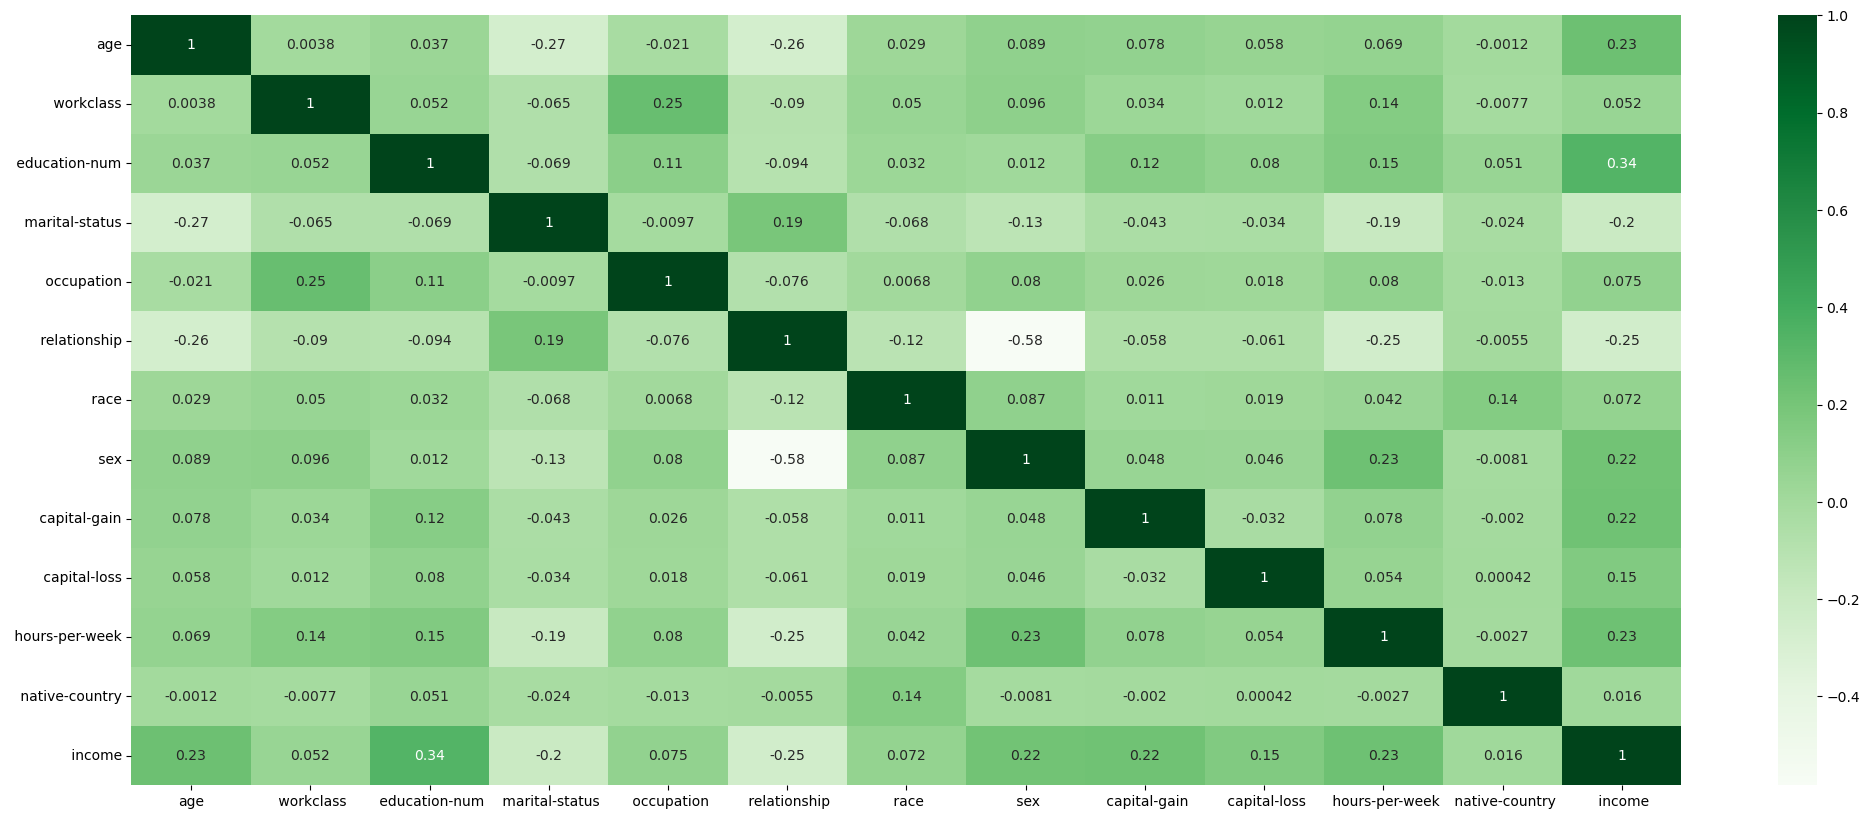

In [84]:
#Using Pearson Correlation
plt.figure(figsize=(25,10))
cor = data_scaled.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Greens)
plt.show()

In [85]:
#Correlation with target variable price
cor_target = abs(cor[" income"])

relevant_features = cor_target
relevant_features 

age                0.234037
 workclass         0.051604
 education-num     0.335154
 marital-status    0.199307
 occupation        0.075468
 relationship      0.250918
 race              0.071846
 sex               0.215980
 capital-gain      0.223329
 capital-loss      0.150526
 hours-per-week    0.229689
 native-country    0.015840
 income            1.000000
Name:  income, dtype: float64

In [86]:
# KBest Features:

In [87]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(f_classif, k=7)
X_important = selector.fit_transform(X_data, y)
mask = selector.get_support()
important_feature_names = X_data.columns[mask]

print(important_feature_names)

Index(['age', ' education-num', ' marital-status', ' relationship', ' sex',
       ' capital-gain', ' hours-per-week'],
      dtype='object')


In [89]:
X

,age,education-num,marital-status,relationship,sex,capital-gain,hours-per-week
0,0.301370,0.800000,0.666667,0.2,1.0,0.021740,0.397959
1,0.452055,0.800000,0.333333,0.0,1.0,0.000000,0.122449
2,0.287671,0.533333,0.000000,0.2,1.0,0.000000,0.397959
3,0.493151,0.400000,0.333333,0.0,1.0,0.000000,0.397959
4,0.150685,0.800000,0.333333,1.0,0.0,0.000000,0.397959
...,...,...,...,...,...,...,...
32556,0.136986,0.733333,0.333333,1.0,0.0,0.000000,0.377551
32557,0.315068,0.533333,0.333333,0.0,1.0,0.000000,0.397959
32558,0.561644,0.533333,1.000000,0.8,0.0,0.000000,0.397959
32559,0.068493,0.533333,0.666667,0.6,1.0,0.000000,0.193878


In [90]:
#Splitting data into Training and testing sets

In [91]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=49)

In [92]:
#Support Vector Machines

In [94]:
#Random Forest Classifier:

In [93]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold, cross_val_score


clf = SVC(kernel='linear', C=1.0, random_state=42)

# perform cross-validation to check for overfitting
scores = cross_val_score(clf, X_train, y_train, cv=5)
print("Cross-validation scores:", scores)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Cross-validation scores: [0.80191939 0.80998081 0.80806142 0.80053753 0.80226531]
Accuracy: 0.7948717948717948
